In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [46]:
behav = pd.read_csv('../data/300behavior.csv')

# Assuming behav is your DataFrame and it's already imported
# Replace all occurrences of 3 with 2 in the 'NextLever' column
behav['NextLever'] = behav['NextLever'].replace(3, 2)
B23behav = behav[(behav['Trial#'] > 20) & ~(behav['Trial#'].isin([40, 60]))]

B23behav.head

<bound method NDFrame.head of       ID    Date  Trial#  Lever  NextLever  WSLS  LeverZmax  LeverZmin  \
20    16  230123      21      3          2     1   2.401602  -1.003824   
21    16  230123      22      3          2     1   2.926855  -1.217437   
22    16  230123      23      3          2     1   1.696856  -1.406294   
23    16  230123      24      3          2     1   1.724995  -1.203465   
24    16  230123      25      3          2     1   0.747431  -1.450247   
...   ..     ...     ...    ...        ...   ...        ...        ...   
1672  32  230407      51      3          1     3   3.332265  -1.602789   
1673  32  230407      52      1          0     0   4.506867  -2.054242   
1674  32  230407      55      1          2     0   0.637471  -3.201188   
1675  32  230407      56      2          0     2   2.911747  -0.353442   
1676  32  230407      59      1          0     0   1.568098  -1.403199   

        LeverAUC    HLZmax    HLZmin       HLAUC  
20     80.581480  2.714354 -3.

In [106]:
# Example dataset
# Replace this with your actual dataset
X = B23behav[['LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC']]  # Predictor variables
y = B23behav['NextLever']  # Target variable with three categories

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features (important for logistic regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a multinomial logistic regression model
# 'multinomial' specifies that the target variable has more than two classes
# 'lbfgs' is an optimization algorithm suitable for multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        30
           2       0.84      1.00      0.91       263

    accuracy                           0.84       312
   macro avg       0.28      0.33      0.30       312
weighted avg       0.71      0.84      0.77       312

Confusion Matrix:
 [[  0   0  19]
 [  0   0  30]
 [  0   0 263]]


c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [48]:
# Extracting the coefficients
coefficients = model.coef_

# Displaying the coefficients
print("Coefficients matrix:\n", coefficients)

feature_names = ['LeverZmax','LeverZmin','LeverAUC','HLZmax','HLZmin','HLAUC']  # Assuming X is a DataFrame

for class_index in range(coefficients.shape[0]):
    print(f"Class {class_index}:")
    for feature_index in range(coefficients.shape[1]):
        print(f"  {feature_names[feature_index]}: {coefficients[class_index, feature_index]}")
    print()


Coefficients matrix:
 [[ 0.45619586 -0.07252622  0.05001933 -0.10097724  0.21127587 -0.08198394]
 [-0.59927257  0.20260698 -0.14344996  0.03653222  0.06428852  0.00120559]
 [ 0.14307671 -0.13008076  0.09343063  0.06444503 -0.2755644   0.08077835]]
Class 0:
  LeverZmax: 0.45619585834608994
  LeverZmin: -0.0725262224663269
  LeverAUC: 0.05001932879842498
  HLZmax: -0.10097724386851054
  HLZmin: 0.21127587473494006
  HLAUC: -0.08198394107540016

Class 1:
  LeverZmax: -0.5992725694764093
  LeverZmin: 0.20260698297031957
  LeverAUC: -0.14344995541197678
  HLZmax: 0.03653221760728464
  HLZmin: 0.06428852091186907
  HLAUC: 0.0012055916528571301

Class 2:
  LeverZmax: 0.14307671113031886
  LeverZmin: -0.13008076050399295
  LeverAUC: 0.09343062661355166
  HLZmax: 0.06444502626122509
  HLZmin: -0.27556439564680796
  HLAUC: 0.08077834942254163



In [51]:
!pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/52/fc/4c0e654ab177558a657eaba369e5a25fbf700f95f1d122f6c083525d58c4/statsmodels-0.14.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/32/0e/0039df17094e8d9d26b69bd8e976e179b1f6cc772f9ffb597640d5016772/patsy-0.5.5-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.8 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.8 

In [52]:
import statsmodels.api as sm

# Fit logistic regression using statsmodels for detailed statistics
# Add a constant to the input features
X_stat = sm.add_constant(X_train)
model_stat = sm.MNLogit(y_train, X_stat)
result_stat = model_stat.fit()

# Print summary for detailed statistics
print(result_stat.summary())


Optimization terminated successfully.
         Current function value: 0.534831
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:              NextLever   No. Observations:                  728
Model:                        MNLogit   Df Residuals:                      714
Method:                           MLE   Df Model:                           12
Date:                Mon, 01 Jan 2024   Pseudo R-squ.:                 0.05240
Time:                        21:47:01   Log-Likelihood:                -389.36
converged:                       True   LL-Null:                       -410.89
Covariance Type:            nonrobust   LLR p-value:                 2.208e-05
NextLever=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3347      0.637      2.095      0.036       0.086       2.583
LeverZmax      -0.4040    

In [53]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(model, X_test, y_test)

# Summarize in a DataFrame
perm_importance_df = pd.DataFrame({'feature': feature_names, 'importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='importance', ascending=False)

print(perm_importance_df)


     feature  importance
5      HLAUC    0.025000
2   LeverAUC    0.019231
3     HLZmax    0.000000
4     HLZmin    0.000000
1  LeverZmin   -0.002564
0  LeverZmax   -0.012821


c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted with

c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


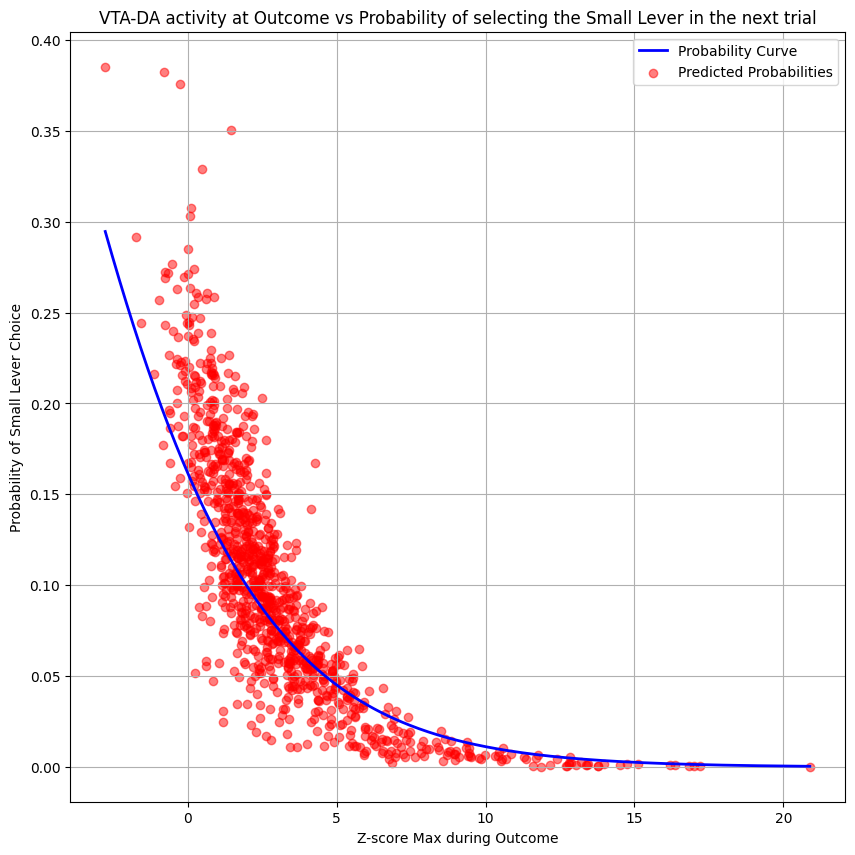

In [103]:
df = B23behav[feature_names]

# Calculate the mean of other features in your dataset
X_mean = df.drop('LeverZmax', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df['LeverZmax'].min(), df['LeverZmax'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 1]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df.copy()
X_data_points['LeverZmax'] = X_data_points['LeverZmax'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 1]

# Plotting the probability curve
plt.figure(figsize=(10, 10))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df['LeverZmax'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Small Lever in the next trial')
plt.xlabel('Z-score Max during Outcome')
plt.ylabel('Probability of Small Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


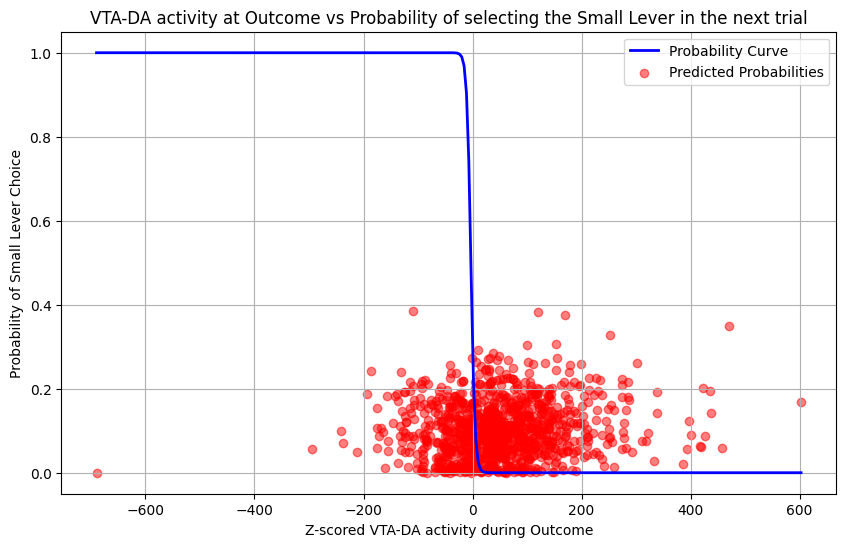

In [101]:
df = B23behav[feature_names]

# Calculate the mean of other features in your dataset
X_mean = df.drop('HLAUC', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df['HLAUC'].min(), df['HLAUC'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverAUC values

# Calculate the predicted probability of NextLever=1 for the curve
prob_next_lever_1_curve = model.predict_proba(X_pred)[:, 1]

# Calculate the predicted probability of NextLever=1 for each data point
X_data_points = df.copy()
X_data_points['HLAUC'] = X_data_points['HLAUC'].astype(float)
prob_next_lever_1_points = model.predict_proba(X_data_points)[:, 1]

# Plotting the probability curve
plt.figure(figsize=(10, 6))
plt.plot(lever_zmax_range, prob_next_lever_1_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df['HLAUC'], prob_next_lever_1_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Small Lever in the next trial')
plt.xlabel('Z-scored VTA-DA activity during Outcome')
plt.ylabel('Probability of Small Lever Choice')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\wonnp\Documents\GitHub\ML-For-Beginners\.virtualenv\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


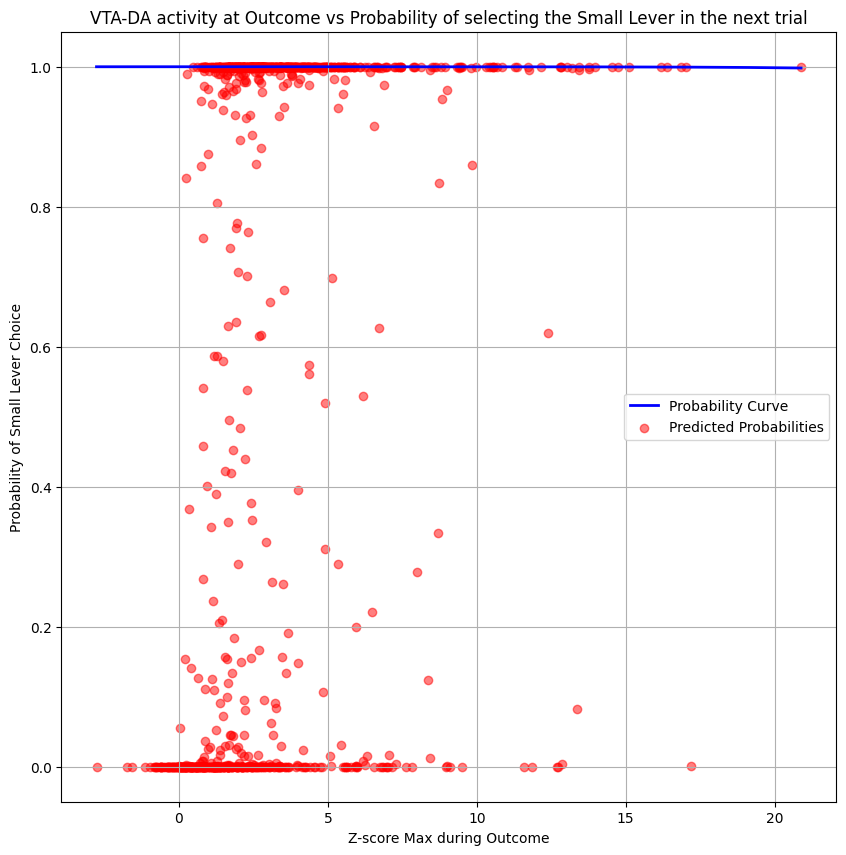

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your logistic regression model is named 'model'
# and it has been fitted already

# Assuming df is your DataFrame
# df = B23behav[feature_names]

# Calculate the mean of other features in your dataset
X_mean = df.drop('LeverZmax', axis=1).mean()

# Generate a range of values for LeverZmax
lever_zmax_range = np.linspace(df['LeverZmax'].min(), df['LeverZmax'].max(), 300)
X_pred = np.repeat(X_mean.values.reshape(1, -1), len(lever_zmax_range), axis=0)
X_pred = np.insert(X_pred, 0, lever_zmax_range, axis=1)  # Insert LeverZmax values

# Calculate the predicted probability of NextLever=2 for the curve
prob_next_lever_2_curve = model.predict_proba(X_pred)[:, 2]

# Calculate the predicted probability of NextLever=2 for each data point
X_data_points = df.copy()
X_data_points['LeverZmax'] = X_data_points['LeverZmax'].astype(float)
prob_next_lever_2_points = model.predict_proba(X_data_points)[:, 2]

# Plotting the probability curve
plt.figure(figsize=(10, 10))
plt.plot(lever_zmax_range, prob_next_lever_2_curve, color='blue', label='Probability Curve', linewidth=2)

# Plotting the individual data points with their predicted probabilities
plt.scatter(df['LeverZmax'], prob_next_lever_2_points, color='red', label='Predicted Probabilities', alpha=0.5)

plt.title('VTA-DA activity at Outcome vs Probability of selecting the Small Lever in the next trial')
plt.xlabel('Z-score Max during Outcome')
plt.ylabel('Probability of Small Lever Choice')
plt.legend()
plt.grid(True)
plt.show()
